In [ ]:
'''
Sanjay Singh
san.singhsanjay@gmail.com
April-2021
To make inference - Image Captioning
'''

'\nSanjay Singh\nsan.singhsanjay@gmail.com\nApril-2021\nTo make inference - Image Captioning\n'

In [ ]:
# start by connecting gdrive into the google colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# packages
import numpy as np
import pandas as pd
import cv2
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import load_model
from IPython.display import Image

In [ ]:
# constants
EMBEDDING_DIM = 200
IMG_WIDTH = 299
IMG_HEIGHT = 299
IMG_CHANNEL = 3

In [ ]:
# function to make prediction of captions
def predict_caption(model, max_caption_length, wordtoix, ixtoword, img_feat):
    in_text = 'startseq'
    for i in range(max_caption_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_caption_length)
        y_hat = model.predict([img_feat,sequence], verbose=0)
        y_hat = np.argmax(y_hat)
        word = ixtoword[y_hat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    caption = in_text.split()
    caption = caption[1:-1]
    caption = ' '.join(caption)
    return caption

In [ ]:
# paths
vocabulary_path = "/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/processed_data/vocabulary.txt"
max_caption_length_path = "/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/processed_data/max_caption_length.txt"
wordtoix_path = "/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/output/trained_models/wordtoix.csv"
ixtoword_path = "/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/output/trained_models/ixtoword.csv"
embedding_matrix_path = "/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/output/trained_models/embedding_matrix.csv"
trained_model_path = "/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/output/trained_models/model_19.h5"
test_image_path = "/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/single_test_image/"

In [ ]:
# reading vocabulary
vocabulary = list()
f_ptr = open(vocabulary_path, 'r')
lines = f_ptr.readlines()
for line in lines:
	vocabulary.append(line.strip())
print("Completed reading vocabulary file")

Completed reading vocabulary file


In [ ]:
# read wordtoix and ixtoword
wordtoix = pd.read_csv(wordtoix_path, header=None)
ixtoword = pd.read_csv(ixtoword_path, header=None)
print("Completed reading wordtoix.csv and ixtoword.csv")

Completed reading wordtoix.csv and ixtoword.csv


In [ ]:
# converting wordtoix and ixtoword to dictionary from dataframe
wordtoix = dict(wordtoix.values)
ixtoword = dict(ixtoword.values)
print("Successfully converted wordtoix and ixtoword from dataframe to dictionary")

Successfully converted wordtoix and ixtoword from dataframe to dictionary


In [ ]:
# getting vocabulary size
vocab_size = len(wordtoix) + 1 # 1 is added for '0'
print("Vocabulary Size: ", vocab_size)

Vocabulary Size:  1652


In [ ]:
# extract maximum length of caption - saved by script_preprocessing.py
f_ptr = open(max_caption_length_path, 'r')
line = f_ptr.readlines()
max_caption_length = int(line[0].split(":")[1].strip())
print("Maximum caption length: ", max_caption_length)

Maximum caption length:  28


In [ ]:
'''# loading embedding_matrix
embedding_matrix = pd.read_csv(embedding_matrix_path, header=None)
print("Successfully loading embedding_matrix, its shape: ", embedding_matrix.shape)'''

In [ ]:
# taking name of test image from user
test_image_name = input("Enter name of test image (saved under '/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/test_image/': ")

Enter name of test image (saved under '/content/gdrive/MyDrive/Flickr8k_ImageCaptioning/test_image/': spiderman.jpeg


In [ ]:
# redaing test image
test_img_array = np.ndarray([1, IMG_WIDTH, IMG_HEIGHT, IMG_CHANNEL])
test_img = cv2.imread(test_image_path + test_image_name)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (IMG_WIDTH, IMG_HEIGHT))
test_img = preprocess_input(test_img)
test_img_array[0] = test_img

In [ ]:
# loading InceptionV3 model
model_inception = InceptionV3(weights='imagenet')
model_inception = Model(model_inception.input, model_inception.layers[-2].output)

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
# generating bottleneck feature for image
img_feat = model_inception.predict(test_img_array)

In [ ]:
# loading trained model for image captioning
model = load_model(trained_model_path)
print("Successfully loaded trained model")

Successfully loaded trained model


In [ ]:
# prediction caption
caption = predict_caption(model, max_caption_length, wordtoix, ixtoword, img_feat)

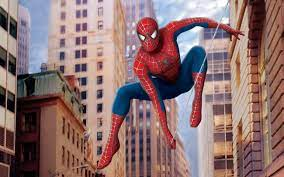

In [ ]:
Image(filename=test_image_path + test_image_name)

In [ ]:
print(caption)

boy in blue shirt is jumping on his skateboard
